<a href="https://colab.research.google.com/github/DeemonDuck/codealpha_tasks/blob/main/CREDIT_SCORING_MODEL_CODEALPHA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step-1: Dataset is already uploaded on the drive and accessed through the path**

  We are already provided with a clean data file which we can directly used to train model but we are manually doing the cleaning and processing and later compare which performs better

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/CODEALPHA_PROJECTS/CREDIT_SCORING_MODEL/DATASET/german.data'

# Loading the dataset...'sep' is used because the data is space-separated, not comma-separated.
try:
    credit_df = pd.read_csv(file_path, sep=' ', header=None)
    print("Dataset loaded successfully!")
    print("Shape of the dataset:", credit_df.shape)
    print("First 5 rows of the dataset:")
    print(credit_df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")

Dataset loaded successfully!
Shape of the dataset: (1000, 21)
First 5 rows of the dataset:
    0   1    2    3     4    5    6   7    8     9   ...    11  12    13  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

     14 15    16 17    18    19 20  
0  A152  2  A173  1  A192  A201  1  
1  A152  1  A173  1  A191  A201  2  
2  A152  1  A172  2  A191  A201  1  
3  A153  1  A173  2  A191  A201  1  
4  A153  2  A173  2  A191  A201  2  

[5 rows x 21 columns]


assigning the meaningful column names from the doc files given with the dataset

In [ ]:
column_names = [
    'checking_status', 'duration_month', 'credit_history', 'purpose', 'credit_amount',
    'savings_status', 'employment_since', 'installment_rate', 'personal_status_sex',
    'other_debtors', 'present_residence_since', 'property_magnitude', 'age',
    'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents',
    'own_telephone', 'foreign_worker', 'credit_risk'
]

# Assigning the list of names to the DataFrame's columns
credit_df.columns = column_names

# Displaying the first 5 rows to confirm the change
print("DataFrame with new column names:")
print(credit_df.head())

DataFrame with new column names:
  checking_status  duration_month credit_history purpose  credit_amount  \
0             A11               6            A34     A43           1169   
1             A12              48            A32     A43           5951   
2             A14              12            A34     A46           2096   
3             A11              42            A32     A42           7882   
4             A11              24            A33     A40           4870   

  savings_status employment_since  installment_rate personal_status_sex  \
0            A65              A75                 4                 A93   
1            A61              A73                 2                 A92   
2            A61              A74                 2                 A93   
3            A61              A74                 2                 A93   
4            A61              A73                 3                 A93   

  other_debtors  ...  property_magnitude age  other_payment_plans

# STEP-2: Now lets Start with Exloratory Data Analysis [EDA]

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   checking_status          1000 non-null   object
 1   duration_month           1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   credit_amount            1000 non-null   int64 
 5   savings_status           1000 non-null   object
 6   employment_since         1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence_since  1000 non-null   int64 
 11  property_magnitude       1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_payment_plans      1000 non-null   object
 14  housing                  1000 non-null   

So no missing Data so lets start with analysis of our Target Variable

Credit Risk Distribution:
credit_risk
0    700
1    300
Name: count, dtype: int64


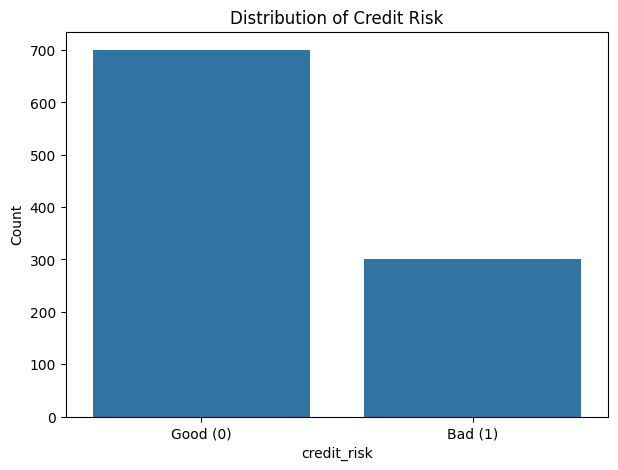

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, let's map the target variable to 0 (Good) and 1 (Bad)
credit_df['credit_risk'] = credit_df['credit_risk'].map({1: 0, 2: 1})

# Get the counts of each class
print("Credit Risk Distribution:")
print(credit_df['credit_risk'].value_counts())

# Visualize the distribution
plt.figure(figsize=(7, 5))
sns.countplot(x='credit_risk', data=credit_df)
plt.title('Distribution of Credit Risk')
plt.xticks([0, 1], ['Good (0)', 'Bad (1)'])
plt.ylabel('Count')
plt.show()

# Step-3 : Exploring the features to see how they relate to credit_risk

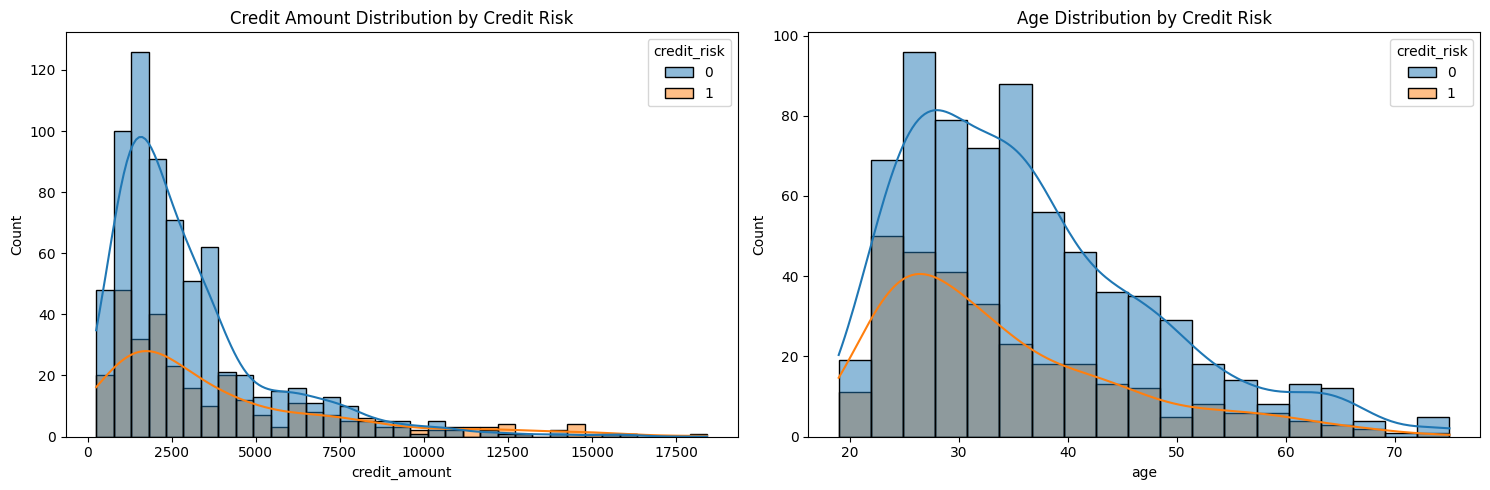

In [ ]:
plt.figure(figsize=(15, 5))

# Plot 1: Credit Amount
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
sns.histplot(data=credit_df, x='credit_amount', hue='credit_risk', kde=True)
plt.title('Credit Amount Distribution by Credit Risk')

# Plot 2: Age
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
sns.histplot(data=credit_df, x='age', hue='credit_risk', kde=True)
plt.title('Age Distribution by Credit Risk')

plt.tight_layout()
plt.show()

"What we can see from theese plots"
1. larger loans tend to be riskier.
2. younger applicants might represent a higher credit risk.

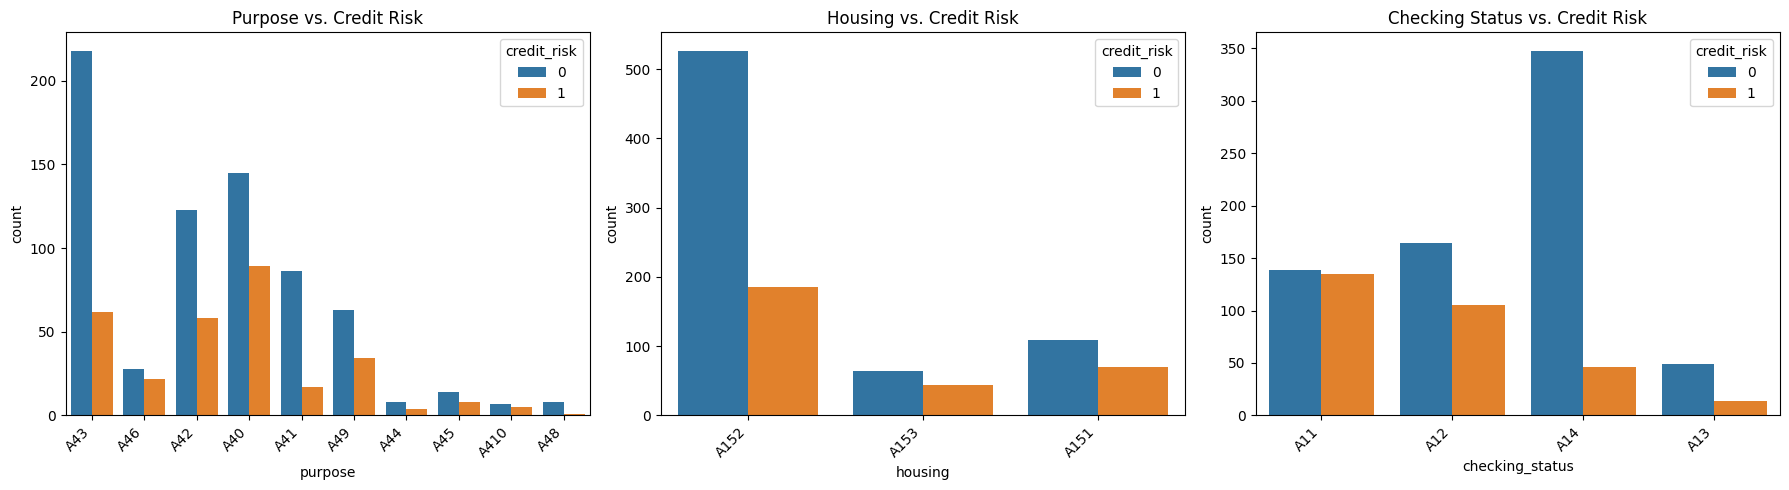

In [ ]:
# List of categorical features we want to analyze
categorical_features = ['purpose', 'housing', 'checking_status']

plt.figure(figsize=(18, 5))

# Loop through each feature and creating a plot
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i+1) # 1 row, 3 columns, i+1 subplot
    sns.countplot(data=credit_df, x=feature, hue='credit_risk')
    plt.title(f'{feature.replace("_", " ").title()} vs. Credit Risk')
    plt.xticks(rotation=45, ha='right') # Rotating labels for better readability

plt.tight_layout()
plt.show()

All the values names are present in .doc files like A43 represent: Radio/Televisions which was provide with the Dataset.
1. Purpose: Loans for 'domestic appliances' or 'radio/tv' might be relatively safe, while loans for 'business' or 'new car' could show a higher proportion of bad risks.
2. Look at the difference between people who 'own' a home, 'rent', or have 'free' housing. Often, those who own their home are considered lower risk.
3. You'll likely see a clear trend where individuals with 'no checking account' or a 'little' balance are far more likely to be a bad credit risk compared to those with a 'rich' account status.

With This our EDA is done. We will now be progressing towards Preproecessing steps.

# **Step-4: Data PreProcessing**

## **Part-1**: The goal is to convert our dataset into a fully numerical format that our machine learning models can understand

In [ ]:
# Separating the features (X) from the target variable (y)
X = credit_df.drop('credit_risk', axis=1)
y = credit_df['credit_risk']

# Performing One-Hot Encoding on the features (X)
X_encoded = pd.get_dummies(X, drop_first=True)

# Displaying the shape and the first few rows of our newly encoded data
print("Shape of the encoded feature set (X_encoded):", X_encoded.shape)
print("\nFirst 5 rows of the encoded data:")
print(X_encoded.head())

Shape of the encoded feature set (X_encoded): (1000, 48)

First 5 rows of the encoded data:
   duration_month  credit_amount  installment_rate  present_residence_since  \
0               6           1169                 4                        4   
1              48           5951                 2                        2   
2              12           2096                 2                        3   
3              42           7882                 2                        4   
4              24           4870                 3                        4   

   age  existing_credits  num_dependents  checking_status_A12  \
0   67                 2               1                False   
1   22                 1               1                 True   
2   49                 1               2                False   
3   45                 1               2                False   
4   53                 2               2                False   

   checking_status_A13  checking_status_A1

## Part - 2 : Final preprocessing step is to scale the numerical data and then split everything into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Scale the numerical features
# Note: We will only be scaling the original numerical columns, not the new one-hot encoded columns.
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transforming the test data using the scaler fitted on the training data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


# Displaying the shapes of the new sets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nFirst 5 rows of scaled training data:")
print(X_train.head())

Shape of X_train: (800, 48)
Shape of X_test: (200, 48)
Shape of y_train: (800,)
Shape of y_test: (200,)

First 5 rows of scaled training data:
     duration_month  credit_amount  installment_rate  present_residence_since  \
828        1.289592       1.925766          0.052281                 1.053413   
997       -0.742595      -0.892853          0.942164                 1.053413   
148        1.289592       0.816433          0.052281                -0.747293   
735        1.289592       0.299568          0.052281                -0.747293   
130        2.305686       1.982655         -1.727486                -0.747293   

          age  existing_credits  num_dependents  checking_status_A12  \
828  1.057784         -0.718745       -0.436436                False   
997  0.242449         -0.718745       -0.436436                False   
148 -0.663479          1.045047       -0.436436                False   
735 -0.572886         -0.718745       -0.436436                 True   
130 -1.025

Everything Regarding This I have mentioned in Note Format in the code Section only. So We will be Progressing towards the NExt Step.

# **Step-5 : Training Models Used**

## **1. Logistic Regression Model**

###Part 1: Train the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Create an instance of the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# 2. Train (fit) the model on the training data
log_reg.fit(X_train, y_train)

# 3. Make predictions on the unseen test data
y_pred_log_reg = log_reg.predict(X_test)

### Part 2: Evaluate the Model's Performance

In [ ]:
# --- Classification Report ---
# Precision, recall, and f1-score for each class
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# --- Confusion Matrix ---
# TP, FP, TN, FN
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# --- ROC-AUC Score ---
# Measures the model's ability to distinguish between classes
roc_auc = roc_auc_score(y_test, y_pred_log_reg)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       140
           1       0.67      0.53      0.59        60

    accuracy                           0.78       200
   macro avg       0.74      0.71      0.72       200
weighted avg       0.77      0.78      0.77       200


Confusion Matrix:
[[124  16]
 [ 28  32]]

ROC-AUC Score: 0.7095


## **Classification Report: Focus on the metrics for class 1 (Bad Risk).**



###**Precision** : Of all the applicants the model flagged as "Bad," what percentage were actually bad? A high precision means the bank won't deny loans to good applicants unnecessarily.

###**Recall** : Of all the applicants who were truly "Bad," what percentage did our model catch? A high recall means the bank is successful at identifying risky individuals.

###**F1-Score** : A balanced measure of Precision and Recall.


###**ROC-AUC Score** : A single number summary (from 0.5 to 1.0) of the model's predictive power. A score around 0.70-0.75 is a decent start for this dataset.

##**2. Decision Tree Model**

### Part-1 : Train the Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 1. Create an instance of the Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)

# 2. Train (fit) the model on the training data
dt_clf.fit(X_train, y_train)

# 3. Make predictions on the test data
y_pred_dt = dt_clf.predict(X_test)

### Part-2 : Evaluate the Decision Tree

In [ ]:
# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# --- Confusion Matrix ---
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# --- Accuracy and ROC-AUC Score ---
accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print(f"\nOverall Accuracy: {accuracy_dt:.4f}")
print(f"ROC-AUC Score: {roc_auc_dt:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       140
           1       0.41      0.47      0.44        60

    accuracy                           0.64       200
   macro avg       0.58      0.59      0.59       200
weighted avg       0.65      0.64      0.65       200


Confusion Matrix:
[[100  40]
 [ 32  28]]

Overall Accuracy: 0.6400
ROC-AUC Score: 0.5905


##*The most likely reason for the poor performance is overfitting.*

##**3. Random Forest Model**

### Part-1 : Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1. Create an instance of the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# 2. Train (fit) the model on the training data
rf_clf.fit(X_train, y_train)

# 3. Make predictions on the test data
y_pred_rf = rf_clf.predict(X_test)

### Part-2 : Evaluate the Random Forest Model

In [ ]:
# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# --- Confusion Matrix ---
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# --- Accuracy and ROC-AUC Score ---
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"\nOverall Accuracy: {accuracy_rf:.4f}")
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       140
           1       0.70      0.35      0.47        60

    accuracy                           0.76       200
   macro avg       0.74      0.64      0.66       200
weighted avg       0.75      0.76      0.73       200


Confusion Matrix:
[[131   9]
 [ 39  21]]

Overall Accuracy: 0.7600
ROC-AUC Score: 0.6429


#**Model Performance Summary**

In [ ]:
# Assuming you have these variables from the previous steps:
# For Logistic Regression: accuracy, roc_auc, and the f1-score for class 1
# For Decision Tree: accuracy_dt, roc_auc_dt, and the f1-score for class 1

# Let's get the F1-scores from the classification reports.
# For Logistic Regression (example value, replace with yours)
f1_log_reg = 0.59 # Replace with the F1-score for class 1 from your report

# For Decision Tree (example value, replace with yours)
f1_dt = 0.44 # Replace with the F1-score for class 1 from your report

# For Random Forest
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
f1_rf = report_rf['1']['f1-score']


# Create a dictionary with the results
summary_data = {
    'Accuracy': [accuracy, accuracy_dt, accuracy_rf],
    'ROC-AUC Score': [roc_auc, roc_auc_dt, roc_auc_rf],
    'F1-Score (Bad Risk)': [f1_log_reg, f1_dt, f1_rf]
}

# Create a pandas DataFrame for a nice display
summary_df = pd.DataFrame(summary_data, index=['Logistic Regression', 'Decision Tree', 'Random Forest'])

# Print the summary table, formatted to 4 decimal places
print("Model Performance Comparison:")
print(summary_df.round(4))

Model Performance Comparison:
                     Accuracy  ROC-AUC Score  F1-Score (Bad Risk)
Logistic Regression      0.78         0.7095               0.5900
Decision Tree            0.64         0.5905               0.4400
Random Forest            0.76         0.6429               0.4667


In [ ]:
import re

# Clean the column names for XGBoost
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns]

##**3. XG BOOST Model**

### Part-1 : Train the XGBoost Model

In [ ]:
import xgboost as xgb

# 1. Create an instance of the XGBoost model
# use_label_encoder=False is recommended to avoid a deprecation warning
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# 2. Train (fit) the model on the training data
xgb_clf.fit(X_train, y_train)

# 3. Make predictions on the test data
y_pred_xgb = xgb_clf.predict(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:24:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Part-2 : Evaluate the XGBoost Model

In [ ]:
# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# --- Confusion Matrix ---
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# --- Accuracy and ROC-AUC Score ---
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print(f"\nOverall Accuracy: {accuracy_xgb:.4f}")
print(f"ROC-AUC Score: {roc_auc_xgb:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       140
           1       0.62      0.50      0.56        60

    accuracy                           0.76       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.75      0.76      0.75       200


Confusion Matrix:
[[122  18]
 [ 30  30]]

Overall Accuracy: 0.7600
ROC-AUC Score: 0.6857


#**Model Performance Summary AFTER XGBoost**

In [ ]:
# First, let's get the F1-score for XGBoost
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
f1_xgb = report_xgb['1']['f1-score']

# Add the new row for XGBoost to our summary DataFrame
summary_df.loc['XGBoost'] = [accuracy_xgb, roc_auc_xgb, f1_xgb]

# Print the final, complete comparison table
print("Final Model Performance Comparison:")
print(summary_df.round(4).sort_values(by='ROC-AUC Score', ascending=False))

Final Model Performance Comparison:
                     Accuracy  ROC-AUC Score  F1-Score (Bad Risk)
Logistic Regression      0.78         0.7095               0.5900
XGBoost                  0.76         0.6857               0.5556
Random Forest            0.76         0.6429               0.4667
Decision Tree            0.64         0.5905               0.4400
